In [1]:
import os
# Changing the working directory
os.chdir('..')
os.getcwd()

'/home/javiermunoz/Universidad/MasterBDyDS/TFM/TFM_DSBD'

In [2]:
import vidaug.augmentors as va 
from PIL import Image, ImageSequence
import cv2
import numpy as np

In [3]:
frame_step = 10
image_size = 0
read_counter = 0

def video_loader(path):
    frames = []
    
    cap = cv2.VideoCapture(path)
    ret = True
    while ret:
        ret,cv2_im = cap.read()
        if ret:
            converted = cv2.cvtColor(cv2_im,cv2.COLOR_BGR2RGB)

            pil_im = Image.fromarray(converted)

            if image_size:
                    pil_im_resize = pil_im.resize(image_size)
            else:
                    pil_im_resize = pil_im
                    
            frames.append(pil_im_resize)
                
    cap.release()
    return frames



In [4]:
path_video = "./data/top_10/train/book/07074.mp4"
frames = video_loader(path_video)

In [5]:
width_of_frame, height_of_frame = frames[0].size

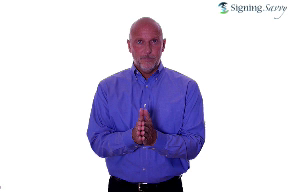

In [6]:
frames[0]

In [7]:


height_of_frame_trans = int((40*height_of_frame + (height_of_frame/10))/height_of_frame)
width_of_frame_tras = int((40*width_of_frame + (width_of_frame/5))/width_of_frame)

sometimes = lambda aug: va.Sometimes(0.5, aug) # Used to apply augmentor with 50% probability
seq = va.Sequential([
    va.RandomTranslate(x=width_of_frame_tras, y=height_of_frame_trans)
])

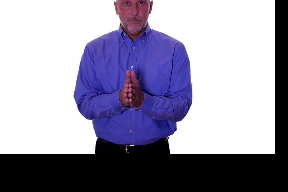

In [8]:
#augment the frames
video_aug = seq(frames)
video_aug[0]

In [9]:
frame_width, frame_height = video_aug[0].size

In [10]:
70/frame_width

0.24305555555555555

In [11]:
cv2_frames=[]
for frame in video_aug:
    open_cv_image = np.array(frame)
    cv2_frames.append(cv2.cvtColor(open_cv_image, cv2.COLOR_RGB2BGR))


In [12]:
cap = cv2.VideoCapture(path_video)
fps = cap.get(cv2.CAP_PROP_FPS)
fourCC = cv2.VideoWriter_fourcc("m", "p", "4", "v")
out = cv2.VideoWriter('./data/top_10/test/before/aug_test.mp4', fourCC, fps, (frame_width, frame_height))

In [13]:
for frame in cv2_frames:
    out.write(frame)

out.release()

In [14]:
vid_name = "08976.mp4"
vid_name.split(".")[0]

'08976'

In [15]:
SPLITS = ['train', 'val', 'test']
DATA_PATH = f"./data"

dataset = "top_10"

for sp in SPLITS:
    for gloss in os.listdir(os.path.join(DATA_PATH, dataset, sp)):
        frames = []
        for video_name in os.listdir(os.path.join(DATA_PATH, dataset, sp, gloss)):
            if "aug" in video_name:
                os.remove(os.path.join(DATA_PATH, dataset, sp, gloss, video_name))